# LSTM Sample 1 - Sin


In [1]:
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pandas.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

Create a one dimensional array to represent the time series data. Then reformat it for LSTM.
See https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/ for details.

In [3]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data2 = data.reshape((1, 10, 1))
print (data.shape)
print (data2.shape)

(10,)
(1, 10, 1)


In [4]:
print (data)
print (data2)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]
  [1. ]]]


In [5]:
data2D = array([
	[0.1, 1.0],
	[0.2, 0.9],
	[0.3, 0.8],
	[0.4, 0.7],
	[0.5, 0.6],
	[0.6, 0.5],
	[0.7, 0.4],
	[0.8, 0.3],
	[0.9, 0.2],
	[1.0, 0.1]])
	
data2Dshaped = data2D.reshape(1, 10, 2)

In [6]:
print (data2D)
print (data2Dshaped)

[[0.1 1. ]
 [0.2 0.9]
 [0.3 0.8]
 [0.4 0.7]
 [0.5 0.6]
 [0.6 0.5]
 [0.7 0.4]
 [0.8 0.3]
 [0.9 0.2]
 [1.  0.1]]
[[[0.1 1. ]
  [0.2 0.9]
  [0.3 0.8]
  [0.4 0.7]
  [0.5 0.6]
  [0.6 0.5]
  [0.7 0.4]
  [0.8 0.3]
  [0.9 0.2]
  [1.  0.1]]]


np.arrange generates numbers between 0 andt the number of samples
np.linspace(start value, end value, number of values

In [7]:
numberSamples = 1000
numericSamples = np.arange(numberSamples)
timeSamples = np.linspace(0,20,numberSamples)
print (numericSamples.shape)
print (numericSamples[:10])
print (timeSamples.shape)
print (timeSamples[:10])
sinSamples = np.sin(timeSamples)
print (sinSamples[:10])

(1000,)
[0 1 2 3 4 5 6 7 8 9]
(1000,)
[0.         0.02002002 0.04004004 0.06006006 0.08008008 0.1001001
 0.12012012 0.14014014 0.16016016 0.18018018]
[0.         0.02001868 0.04002934 0.06002396 0.07999452 0.09993302
 0.11983146 0.13968188 0.15947632 0.17920684]


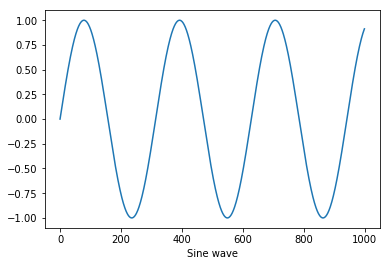

In [8]:
from matplotlib import pyplot as plt
plt.plot(sinSamples)
#plt.ylabel('some numbers')
plt.xlabel('Sine wave')
plt.show()

In [32]:
# split into train and test sets
train_size = int(len(sinSamples) * 0.70)
test_size = len(sinSamples) - train_size
sin_train = sinSamples[0:train_size]
sin_test  = sinSamples[train_size:len(sinSamples)]
print ("train shape : " , train.shape)
print ("test shape : " , test.shape)




train shape :  (700,)
test shape :  (300,)


The above sets up the 1-d sin data for input into a LSTM system 


In [29]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    

In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,sin_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,sin_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (689, 10, 1)
Shape of test set: (289, 10, 1)


In [60]:
print('Build model...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')



Build model...
Train...


In [61]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=100)

Train on 689 samples, validate on 289 samples
Epoch 1/100
 - 2s - loss: 0.1358 - val_loss: 0.0236
Epoch 2/100
 - 0s - loss: 0.0082 - val_loss: 0.0044
Epoch 3/100
 - 0s - loss: 0.0042 - val_loss: 0.0041
Epoch 4/100
 - 0s - loss: 0.0034 - val_loss: 0.0038
Epoch 5/100
 - 0s - loss: 0.0033 - val_loss: 0.0035
Epoch 6/100
 - 0s - loss: 0.0032 - val_loss: 0.0033
Epoch 7/100
 - 0s - loss: 0.0032 - val_loss: 0.0032
Epoch 8/100
 - 0s - loss: 0.0031 - val_loss: 0.0030
Epoch 9/100
 - 0s - loss: 0.0029 - val_loss: 0.0029
Epoch 10/100
 - 0s - loss: 0.0027 - val_loss: 0.0028
Epoch 11/100
 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 12/100
 - 0s - loss: 0.0024 - val_loss: 0.0025
Epoch 13/100
 - 0s - loss: 0.0022 - val_loss: 0.0022
Epoch 14/100
 - 0s - loss: 0.0020 - val_loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0018 - val_loss: 0.0018
Epoch 16/100
 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/100
 - 0s - loss: 0.0014 - val_loss: 0.0014
Epoch 18/100
 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/

In [62]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


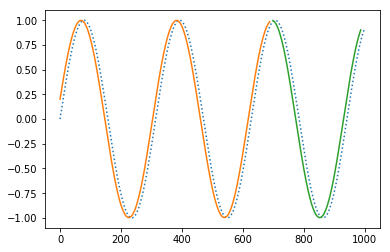

In [63]:
from matplotlib import pyplot as plt
# plot baseline and predictions
plt.plot(sinSamples, linestyle=':')

plt.plot(trainPredict)
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list,testPredict)